In [660]:
import math
import matplotlib.pyplot as plt
import random
import sys
import numpy as np

In [661]:
import math

class Node:
    
    # Initialize node with RGB values
    def __init__(self, r=0, g=0, b=0):
        self.r = r
        self.g = g  
        self.b = b
        self.X = None  
        self.Y = None
        self.Z = None
        self.L = None
        self.A = None
        self.B = None
        self.neighbors = []
        
    # Calculate XYZ transformation
    def calculate_xyz(self):

        var_R = (self.r / 255.0)
        var_G = (self.g / 255.0)  
        var_B = (self.b / 255.0)

        if (var_R > 0.04045):
            var_R = math.pow((var_R + 0.055) / 1.055, 2.4)
        else:
            var_R = var_R / 12.92

        if (var_G > 0.04045):
            var_G = math.pow((var_G + 0.055) / 1.055, 2.4)
        else:
            var_G = var_G / 12.92

        if (var_B > 0.04045):
            var_B = math.pow((var_B + 0.055) / 1.055, 2.4)
        else:
            var_B = var_B / 12.92

        var_R *= 100
        var_G *= 100
        var_B *= 100

        self.X = var_R * 0.4124 + var_G * 0.3576 + var_B * 0.1805 
        self.Y = var_R * 0.2126 + var_G * 0.7152 + var_B * 0.0722
        self.Z = var_R * 0.0193 + var_G * 0.1192 + var_B * 0.9505
    
    # Calculate Lab transformation
    def calculate_lab(self):

        var_X = self.X / 94.811    
        var_Y = self.Y / 100.0
        var_Z = self.Z / 107.304

        if (var_X > 0.008856): 
            var_X = math.pow(var_X, 1/3)
        else:
            var_X = (7.787 * var_X) + (16 / 116)

        if (var_Y > 0.008856): 
            var_Y = math.pow(var_Y, 1/3)
        else:
            var_Y = (7.787 * var_Y) + (16 / 116)

        if (var_Z > 0.008856): 
            var_Z = math.pow(var_Z, 1/3)
        else:
            var_Z = (7.787 * var_Z) + (16 / 116)

        self.L = (116 * var_Y) - 16
        self.A = 500 * (var_X - var_Y)
        self.B = 200 * (var_Y - var_Z)
        
    # Calculate color distance between nodes
    def calculate_distance(self, other):
        
        delta_L = other.L - self.L
        delta_A = other.A - self.A  
        delta_B = other.B - self.B
        
        dist = math.sqrt(delta_L ** 2 + delta_A ** 2 + delta_B ** 2)
        
        return dist
    
    # Calculate Euclidean
    def calculate_euclidean_distance(self, other):
        distance = math.sqrt((self.x - other.x) ** 2 + (self.y - other.y) ** 2)
        return distance
        
        

In [662]:
# Compare node distance for nearer neighbors
def compare_node_dist(n1, n2):

    main_node = None  
    dist1 = n1.calculate_distance(main_node)
    dist2 = n2.calculate_distance(main_node)
    
    return dist1 < dist2

In [663]:
# Compare node distance for nearer neighbors (euclidean)
def compare_node_dist(n1, n2):

    main_node = None  
    dist1 = n1.calculate_euclidean_distance(main_node)
    dist2 = n2.calculate_euclidean_distance(main_node)
    
    return dist1 < dist2

In [664]:
# Generate ring or cicle topology
def generate_ring_topology(nodes):
    for i, node in enumerate(nodes):
        angle = (2 * math.pi * i) / N
        node.x = math.cos(angle)
        node.y = math.sin(angle)

In [665]:
# Generate spectacles topology
def generate_spectacles_topology(nodes):
    center1 = (-2, 0)
    center2 = (0, 0)
    center3 = (2, 0)
    radius = 1  # Define the radius for the circles
    i = 0
    
    
    # Plot nodes left circle
    for i in range(2 * N // 5):
        angle = (2 * math.pi * i) / (2 * N // 5)
        x = center1[0] + radius * math.cos(angle)
        y = center1[1] + radius * math.sin(angle)
        nodes[i].x = x
        nodes[i].y = y
    #print(i)

    # Plot node semi-circle
    for i in range(2 * N // 5, 3 * N // 5):
        angle = (math.pi / (N // 5)) * i
        #angle = (math.pi) 
        x = center2[0] + radius * math.cos(angle)
        y = center2[1] + radius * math.sin(angle)
        nodes[i].x = x
        nodes[i].y = y
    #print(i)

    # Plot nodes right circle
    for i in range(3 * N // 5, N):
        angle = (2 * math.pi * (i - 3 * N // 5)) / (2 * N // 5)
        x = center3[0] + radius * math.cos(angle)
        y = center3[1] + radius * math.sin(angle)
        nodes[i].x = x
        nodes[i].y = y
    #print(i)
        
    # Plot nodes
    plt.figure(figsize=(20, 20)) 
    plt.axis('equal')
    plt.axis('off')
    
    #for n in nodes:
        #plt.plot(n.x, n.y, 'ko')
        
    #plt.show()

In [666]:
#generate_spectacles_topology(nodes)

In [667]:
# Input arguments

# Command-line arguments (jupyter notebook doesn't have command line)
sys.argv = ["R", "1000", "30"] #R, 1000, 30

topology = sys.argv[0]
N = int(sys.argv[1])
k = int(sys.argv[2])

#topology = input("Enter the topology (R for Ring, S for Spectacles): ")
#N = int(input("Enter the number of nodes: "))
#k = int(input("Enter the number of neighbors (k): "))

nodes = []

In [668]:
if topology == 'R':
    # Generate nodes
    red_count = green_count = blue_count = N // 3
    for i in range(N):
        if i >= N // 3 and i < 2 * (N // 3):
            # Green nodes
            r = random.randint(0, 80)
            g = random.randint(200, 255)
            b = random.randint(0, 80)
        elif i >= 2 * (N // 3):
            # Blue nodes
            r = random.randint(0, 80)
            g = random.randint(0, 80)
            b = random.randint(200, 255)
        else:
            # Red nodes
            r = random.randint(200, 255)
            g = random.randint(0, 80)
            b = random.randint(0, 80)

        node = Node(r, g, b)
        nodes.append(node)

    # Shuffle nodes to arrange them randomly in the ring/circle
    random.shuffle(nodes)

In [669]:
# Generate topology from inputs
if topology == 'R':
    generate_ring_topology(nodes)
elif topology == 'S':
    # Generate nodes
    nodes = [Node() for _ in range(N)]
    generate_spectacles_topology(nodes)

In [670]:
# Initialize neighbors
for i, node in enumerate(nodes):
    # Determine neighbor indices
    neighbor_indices = [j for j in range(N) if j != i]
    # Choose k random neighbors
    neighbors = random.sample(neighbor_indices, k)
    # Add neighbors to node's neighbor list
    node.neighbors = [nodes[j] for j in neighbors]
if topology == 'R':
    for node in nodes:
       node.calculate_xyz()
       node.calculate_lab()

Done
Cycle 0: 3379329.494929943
Done
Cycle 1: 3278757.402104796
Done
Cycle 2: 3187949.298243496
Done
Cycle 3: 3085960.415627876
Done
Cycle 4: 2995527.810719961
Done
Cycle 5: 2908219.2201722097
Done
Cycle 6: 2813045.647368226
Done
Cycle 7: 2727222.764887416
Done
Cycle 8: 2652855.8524194225
Done
Cycle 9: 2561299.149033143
Done
Cycle 10: 2479852.9145185323
Done
Cycle 11: 2393299.516553321
Done
Cycle 12: 2318805.4137456613
Done
Cycle 13: 2240348.17420916
Done
Cycle 14: 2169817.706938578
Done
Cycle 15: 2100956.03808065
Done
Cycle 16: 2040074.398897469
Done
Cycle 17: 1985470.3736830398
Done
Cycle 18: 1931553.9811030864
Done
Cycle 19: 1884954.127069933
Done
Cycle 20: 1840769.565041647
Done
Cycle 21: 1805245.7126066012
Done
Cycle 22: 1770849.2349054608
Done
Cycle 23: 1736911.0958374608
Done
Cycle 24: 1709790.1349627269
Done
Cycle 25: 1685810.5658970352
Done
Cycle 26: 1662374.196060134
Done
Cycle 27: 1640413.457046894
Done
Cycle 28: 1621450.9190984494
Done
Cycle 29: 1608666.242138096
Done
Cycle

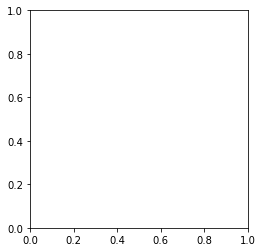

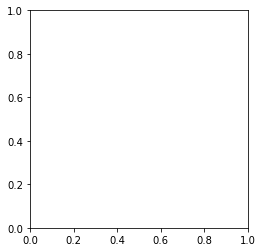

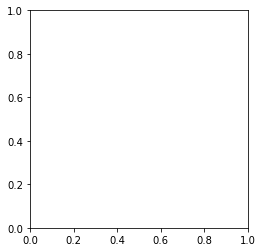

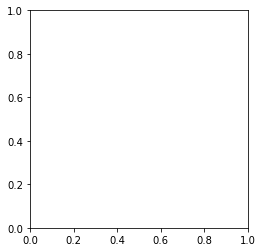

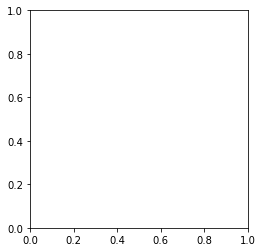

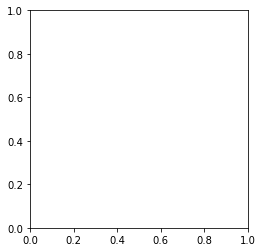

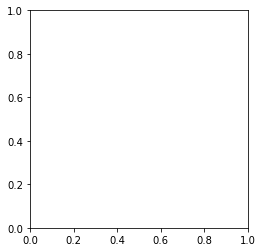

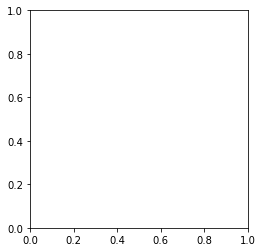

In [671]:
# Run cycles 
plot_cycle = 5 #5
option = 2

for cycle in range(40): #40

    # Communication
    for i in range(len(nodes)):
        
        n = nodes[i]
    
        # Choose a random neighbor
        neighbor = random.choice(n.neighbors)
        
        if option == 1:
            
            # Option 1, Only receiving neighbor updates neighbor list
            new_neighbors = neighbor.neighbors[:]
            new_neighbors.append(n)
            if topology == 'R':
                new_neighbors.sort(key=lambda node: neighbor.calculate_distance(node))
            elif topology == 'S':
                new_neighbors.sort(key=lambda node: neighbor.calculate_euclidean_distance(node))
            new_neighbors = new_neighbors[:k]

            neighbor.neighbors = new_neighbors
            
        if option == 2:

            # Option 2, Both sender and receiver nodes update neighbor lists
            new_neighbors_n = n.neighbors[:]
            new_neighbors_neighbor = neighbor.neighbors[:]

            new_neighbors_n.append(neighbor)
            new_neighbors_neighbor.append(n)

            if topology == 'R':
                new_neighbors_n.sort(key=lambda node: neighbor.calculate_distance(node))
            elif topology == 'S':
                new_neighbors_n.sort(key=lambda node: neighbor.calculate_euclidean_distance(node))
            new_neighbors_n = new_neighbors_n[:k]
            
            if topology == 'R':
                new_neighbors_neighbor.sort(key=lambda node: neighbor.calculate_distance(node))
            elif topology == 'S':
                new_neighbors_neighbor.sort(key=lambda node: neighbor.calculate_euclidean_distance(node))
            new_neighbors_neighbor = new_neighbors_neighbor[:k]

            n.neighbors = new_neighbors_n
            neighbor.neighbors = new_neighbors_neighbor

    if cycle % plot_cycle == 0:

        # Plot nodes
        fig, ax = plt.subplots()
        
        if topology == "R":  # Ring Topology
            # Plot nodes and connections
            plt.figure(figsize=(20, 20)) 
            plt.axis('equal')
            plt.axis('off')

            for n in nodes:
                plt.plot(n.x, n.y, 'ko')
                for neighbor in n.neighbors:
                    plt.plot([n.x, neighbor.x], [n.y, neighbor.y], 'k-', linewidth=0.3)

            ax.set(aspect='equal') 
            filename = f"{topology}_N{N}_k{k}_{cycle}.png"  # Adjusted filename
            plt.savefig(filename)
            plt.close()

        elif topology == "S":  # Spectacles Topology
            plt.figure(figsize=(20, 20)) 
            plt.axis('equal')
            plt.axis('off')
            
            # Plot nodes
            for n in nodes:
                plt.plot(n.x, n.y, 'ko')
            
            
            # Plot connections between two nearest nodes
            for i, n in enumerate(nodes):
                for neighbor in n.neighbors[0:1]:
                    plt.plot([n.x, neighbor.x], [n.y, neighbor.y], 'k-', linewidth=0.8)
            
            
            

            plt.savefig(f"{topology}_N{N}_k{k}_{cycle}.png")
            plt.close()
            

        

        # Output neighbors 
        with open(f"{topology}_N{N}_k{k}_{cycle}.txt", "w") as f:  # Adjusted filename
            for i in range(len(nodes)):
                n = nodes[i]
                f.write(f"{i}: ")
                for neighbor in n.neighbors:
                    f.write(f"{nodes.index(neighbor)} ")
                    f.write("\n")

    print("Done")

    # Print distance
    total_dist = 0
    for n in nodes:
        for neighbor in n.neighbors:
            if topology == 'R':
                total_dist += n.calculate_distance(neighbor)
            elif topology == 'S':
                total_dist += n.calculate_euclidean_distance(neighbor)

    print(f"Cycle {cycle}: {total_dist}")

print("Done")
